In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
import numpy as np
import cartopy.geodesic as cargeo
from shapely.geometry import Polygon
from netCDF4 import Dataset
import pyart
import warnings
warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



C:\Users\Admin\anaconda3\envs\pyart_env\lib\site-packages\wradlib\io\radolan.py:939: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "add_offset": np.float(0),
C:\Users\Admin\anaconda3\envs\pyart_env\lib\site-packages\wradlib\io\radolan.py:948: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "add_offset": np.float(0),
C:\Users\Admin\anaconda3

In [2]:
# Read files .xls (Lat-Lon gauges)
data = pd.ExcelFile("stationLATLON.xlsx")
df =pd.read_excel(data)
df=df[['STT','Tên Trạm','Latitude','Longitude']]

In [3]:
# Draw Range_Rings
circle_points_50km= cargeo.Geodesic().circle(lon=103.526,lat=21.5632, radius=50000, n_samples=180, endpoint=False)
circle_points_100km= cargeo.Geodesic().circle(lon=103.526,lat=21.5632, radius=100000, n_samples=180, endpoint=False)
circle_points_200km= cargeo.Geodesic().circle(lon=103.526,lat=21.5632, radius=200000, n_samples=180, endpoint=False)
geom_50km=Polygon(circle_points_50km)
geom_100km=Polygon(circle_points_100km)
geom_200km=Polygon(circle_points_200km)

In [4]:
# Read file netCDF and prepare datas to plot
dataNC=Dataset('PHA2102082300.nc')
lon=dataNC.variables['longitude'][:]
lat=dataNC.variables['latitude'][:]
lons,lats=np.meshgrid(lon,lat)
pre=dataNC.variables['precipitation'][:][33,:,:]

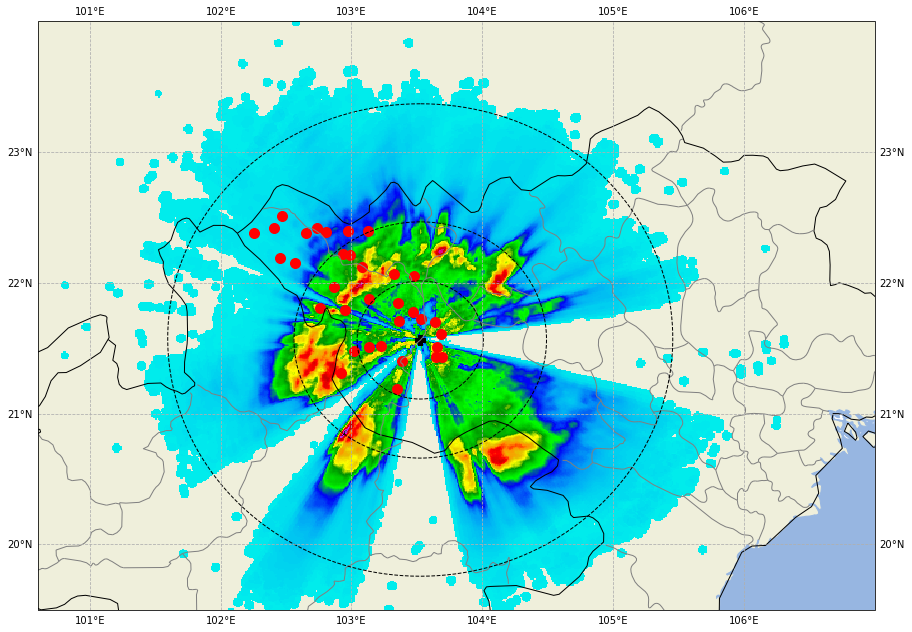

In [5]:
#plot map with datas
fig=plt.figure(figsize=(15,18))
ax=fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN.with_scale('10m'))
ax.add_feature(cfeat.COASTLINE.with_scale('50m'))
ax.add_feature(cfeat.BORDERS.with_scale('50m'))
state_provinces_lines=cfeat.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='10m',facecolor='none')
ax.add_feature(state_provinces_lines,edgecolor='gray')
ax.gridlines(draw_labels=True,linestyle='--')
ax.set_extent((100.6,107,19.5,24),crs=ccrs.PlateCarree())
ax.add_geometries((geom_50km,), crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1, linestyle='--')
ax.add_geometries((geom_100km,), crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1, linestyle='--')
ax.add_geometries((geom_200km,), crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1, linestyle='--')
ax.pcolormesh(lons,lats,pre,shading='flat', cmap=pyart.graph.cm.NWSRef)
ax.scatter(x=df["Longitude"],y=df["Latitude"],transform=ccrs.PlateCarree(), color="red",s=100, alpha=1,marker='o')
ax.scatter(x=103.526,y=21.5632,transform=ccrs.PlateCarree(), color="black",s=100, alpha=1,marker='P')

In [6]:
dataNC.variables['time']

<class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    units: minutes since 0001-01-01 00:00
    calendar: gregorian
    standard_name: time
    axis: T
unlimited dimensions: time
current shape = (37,)
filling on, default _FillValue of -9223372036854775806 used